# Computer Vision and OpenCV
- Course: Self Driving Car Nanodegree
- Lesson: Advanced Lane Finding
- Topic: Combining Thresholds

    img = mpimg.imread(fileName)
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
    img = cv2.imread(fileName)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Sobel in the X axis:
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=kernel_size)

    # Sobel in the Y axis:
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=kernel_size)

    # Absolute value from the x derivative
    abs_sobelx = np.absolute(sobelx)
    
    # Absolute value from the x derivative
    abs_sobely = np.absolute(sobely)
    
    # Gradient magnitude (from both axis)
    magnitude = np.sqrt(sobelx**2 + sobely**2)
    
    # Gradient direction in radians
    dir_gradient = np.arctan2(abs_sobely, abs_sobelx)
    
    # Convert absolute value image to 8-bit 
    scaled_<measure> = np.uint8(255 * <measure> / np.max(<measure>))
    
    # Apply min max thresholds and convert to 0 if not in the range and 1 if within the range
    binary_output = np.zeros_like(scaled_<measure>)
    binary_output[(scaled_<measure> >= thresh_min) & (scaled_<measure> <= thresh_max)] = 1
    
    # Plot grayscale output
    plt.imshow(binary_output, cmap='gray')

Sobel operator allows to calculate the image derivative in X or Y axis. As presented previously, several measurements can be derived from those gradients. Combining those measurements with they respective threshold can easy the Canny edge detection for lane lines.

The example below present a pipeline to apply those different measurements and thresholds.

In [6]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pickle
%matplotlib inline

# Read in an image
image = mpimg.imread('13-input-imgCenterCamera-xygrad.jpg')

In [15]:
# Define a function that applies Sobel x and y, 
# then computes the magnitude of the gradient
# and applies a threshold
def abs_sobel_thresh(img, orient='x', sobel_kernel=3, thresh=(0, 255)):    
    # Apply the following steps to img
    # 1) Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # 2) Take the derivative in x or y given orient = 'x' or 'y'
    x = 1 if orient == 'x' else 0
    y = 1 if orient == 'y' else 0
    sobel = cv2.Sobel(gray, cv2.CV_64F, x, y)
    # 3) Take the absolute value of the derivative or gradient
    abs_sobel = np.absolute(sobel)
    # 4) Scale to 8-bit (0 - 255) then convert to type = np.uint8
    scaled_sobel = np.uint8(255 * abs_sobel / np.max(abs_sobel))
    # 5) Create a mask of 1's where the scaled gradient magnitude 
            # is > thresh_min and < thresh_max
    binary_output = np.zeros_like(scaled_sobel)
    binary_output[(scaled_sobel > thresh[0]) & (scaled_sobel < thresh[1])] = 1
    # 6) Return this mask as your binary_output image
    return binary_output

In [8]:
# Define a function that applies Sobel x and y, 
# then computes the magnitude of the gradient
# and applies a threshold
def mag_thresh(img, sobel_kernel=3, mag_thresh=(0, 255)):
    # Apply the following steps to img
    # 1) Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # 2) Take the gradient in x and y separately
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    # 3) Calculate the magnitude 
    magnitude = np.sqrt(sobelx**2 + sobely**2)
    # 4) Scale to 8-bit (0 - 255) and convert to type = np.uint8
    scale_magnitude = np.uint8(255 * magnitude / np.max(magnitude))
    # 5) Create a binary mask where mag thresholds are met
    binary_output = np.zeros_like(scale_magnitude)
    binary_output[(scale_magnitude > mag_thresh[0]) & (scale_magnitude < mag_thresh[1])] = 1
    # 6) Return this mask as your binary_output image
    return binary_output

In [9]:
# Define a function that applies Sobel x and y, 
# then computes the direction of the gradient
# and applies a threshold.
def dir_threshold(img, sobel_kernel=3, thresh=(0, np.pi/2)):
    
    # Apply the following steps to img
    # 1) Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # 2) Take the gradient in x and y separately
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    # 3) Take the absolute value of the x and y gradients
    abs_sobelx = np.absolute(sobelx)
    abs_sobely = np.absolute(sobely)
    # 4) Use np.arctan2(abs_sobely, abs_sobelx) to calculate the direction of the gradient 
    dir_gradient = np.arctan2(abs_sobely, abs_sobelx)
    # 5) Create a binary mask where direction thresholds are met
    binary_output = np.zeros_like(dir_gradient)
    binary_output[(dir_gradient >= thresh[0]) & (dir_gradient <= thresh[1])] = 1
    # 6) Return this mask as your binary_output image
    return binary_output

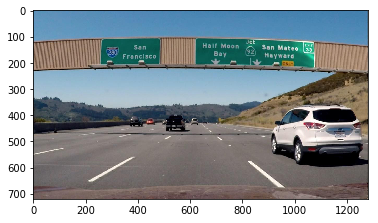

In [17]:
plt.imshow(image)
plt.show()

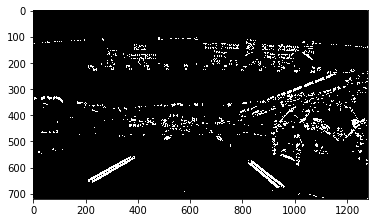

In [19]:
# Choose a Sobel kernel size
ksize = 31 # Choose a larger odd number to smooth gradient measurements

# Apply each of the thresholding functions
gradx = abs_sobel_thresh(image, orient='x', sobel_kernel=ksize, thresh=(30, 200))
grady = abs_sobel_thresh(image, orient='y', sobel_kernel=ksize, thresh=(30, 200))
mag_binary = mag_thresh(image, sobel_kernel=ksize, mag_thresh=(30, 200))
dir_binary = dir_threshold(image, sobel_kernel=ksize, thresh=(0.7, 1.3))
combined = np.zeros_like(dir_binary)
combined[((gradx == 1) & (grady == 1)) | ((mag_binary == 1) & (dir_binary == 1))] = 1
plt.imshow(combined, cmap='gray')
plt.show()

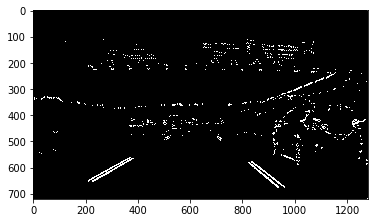

In [22]:
# Choose a Sobel kernel size
ksize = 21 # Choose a larger odd number to smooth gradient measurements

# Apply each of the thresholding functions
gradx = abs_sobel_thresh(image, orient='x', sobel_kernel=ksize, thresh=(50, 200))
grady = abs_sobel_thresh(image, orient='y', sobel_kernel=ksize, thresh=(50, 200))
mag_binary = mag_thresh(image, sobel_kernel=ksize, mag_thresh=(50, 200))
dir_binary = dir_threshold(image, sobel_kernel=ksize, thresh=(0.7, 1.3))
combined = np.zeros_like(dir_binary)
combined[((gradx == 1) & (grady == 1)) | ((mag_binary == 1) & (dir_binary == 1))] = 1
plt.imshow(combined, cmap='gray')
plt.show()